In [96]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
 
# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [97]:
PATH_TO_DATA = r"C:\Users\Reza\trainData.csv"
X_train= pd.read_csv(PATH_TO_DATA,header=None).values

PATH_TO_DATA1 = r"C:\Users\Reza\trainLabels.csv"
y_train= pd.read_csv(PATH_TO_DATA1,header=None).values

PATH_TO_DATA2 = r"C:\Users\Reza\testData.csv"
X_test= pd.read_csv(PATH_TO_DATA2,header=None).values

PATH_TO_DATA3 = r"C:\Users\Reza\testLabels.csv"
y_test= pd.read_csv(PATH_TO_DATA3,header=None).values






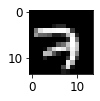

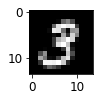

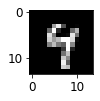

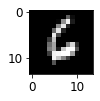

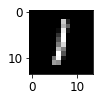

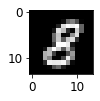

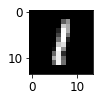

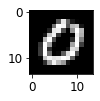

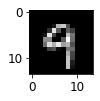

In [98]:
#First lets visualise some
# Reshape The data for plotting
import math
n1,n2=X_train.shape
n3=int(math.sqrt(n2))
X_train1=X_train.reshape((n1,n3,n3))

m1,m2=X_test.shape
m3=int(math.sqrt(n2))
X_test1=X_test.reshape((m1,m3,m3))

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train1[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [99]:
# # preprocces & Normalising
# #Normalising The data
# xScaler = MinMaxScaler().fit(X_train);        #This has changed
# yScaler = MinMaxScaler().fit(y_train.reshape(-1, 1));   #This has changed
# X_train = xScaler.transform(X_train)
# X_test  = xScaler.transform(X_test)
# y_train = yScaler.transform(y_train.reshape(-1, 1))
# y_test  = yScaler.transform(y_test.reshape(-1, 1))

In [100]:
from sklearn.naive_bayes import GaussianNB   

clf = GaussianNB()  

# fitting the classifier
clf.fit(X_train, y_train.ravel())

GaussianNB()

In [101]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 50.7%


# Computing The Prior Of Each Class

In [102]:
#Computing The Prior
prior=np.zeros((10,1))
for j in range(10):
    for i in range(len(y_train)):
        if y_train[i]==j:
            prior[j,0]+=1
prior=prior/len(y_train)
print("prior for each class is: \n",prior )

prior for each class is: 
 [[0.1044]
 [0.1128]
 [0.1006]
 [0.1078]
 [0.089 ]
 [0.0858]
 [0.1026]
 [0.104 ]
 [0.0964]
 [0.0966]]


In [110]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

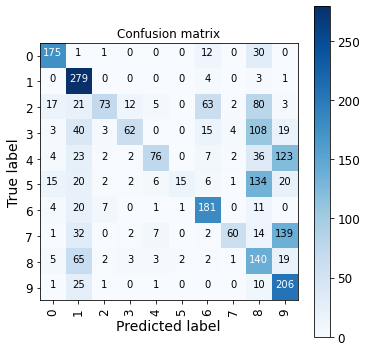

In [112]:
class_names=np.arange(0,10)
from sklearn.metrics import confusion_matrix
confusion_mtx1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx1, class_names)

# Naive Bayes from Scratch

In [103]:
# train=X_train1.copy()
# list=y_train
# train.insert(n2, "number", list, True)

# test=X_test1.copy()
# list1=y_test
# test.insert(n2, "number", list1, True)

# listt=['x%d' % i for i in range(0, m2)]
# listt.append("number")
# train.columns =listt
# test.columns=listt
# train

In [104]:
# def calculate_prior(df, Y):
#     classes = sorted((train[Y].unique()).tolist())
#     prior = []
#     for i in classes:
#         prior.append(len(df[df[Y]==i])/len(df))
#     return prior

In [105]:
# def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
#     feat = list(df.columns)
#     df = df[df[Y]==label]
#     mean, std = df[feat_name].mean(), df[feat_name].std()
#     p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
#     return p_x_given_y

In [106]:
# def naive_bayes_gaussian(df, X, Y):
#     # get feature names
#     #features = list(df.columns)[:-1]
#     features = df.columns[:-1].tolist()
#     # calculate prior
#     prior = calculate_prior(df, Y)

#     Y_pred = []
#     # loop over every data sample
#     for x in X:
#         # calculate likelihood
#         #labels = sorted(list(df[Y].unique()))
#         likelihood = [1]*len(labels)
#         for j in range(len(labels)):
#             for i in range(len(features)):
#                 likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

#         # calculate posterior probability (numerator only)
#         post_prob = [1]*len(labels)
#         for j in range(len(labels)):
#             post_prob[j] = likelihood[j] * prior[j]

#         Y_pred.append(np.argmax(post_prob))
#     return np.array(Y_pred)

In [107]:
# X_test = test.iloc[:,:-1].values
# Y_test = test.iloc[:,-1].values

# Y_pred = naive_bayes_gaussian(train,X=X_test,Y="number")
